In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [11]:
Steel_Prod_Comp = pd.read_excel("E:\moje\cody\python\pandas\Dane\Steel_Production_Company_08-16.xlsx")
Steel_Prod_Country = pd.read_excel("E:\moje\cody\python\pandas\Dane\Steel_Production_Country_08-16.xlsx")

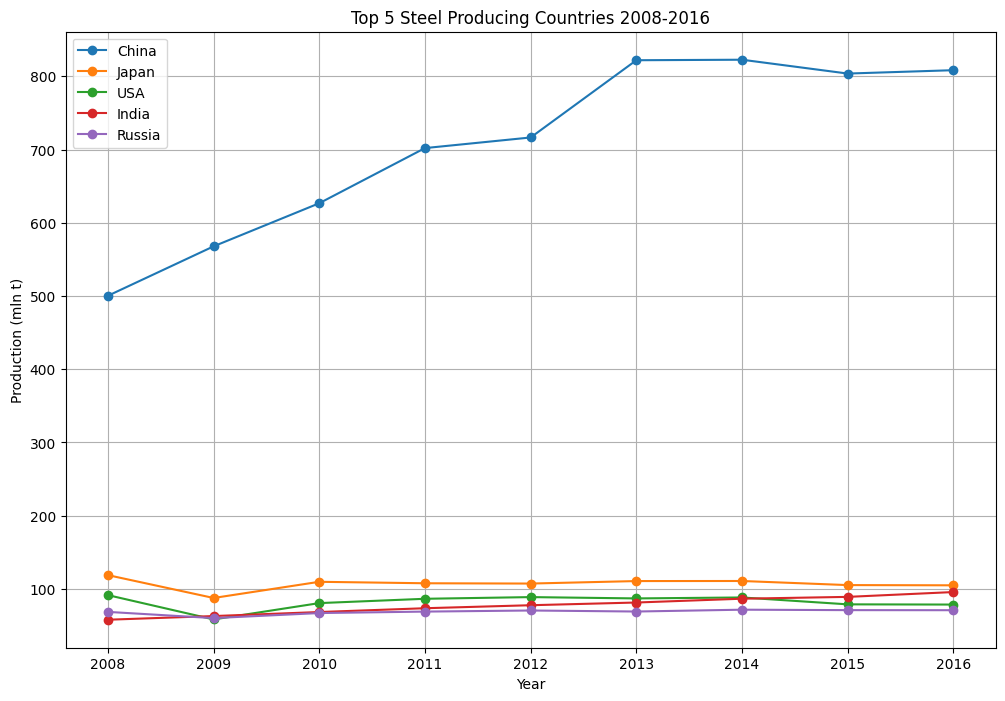

In [12]:
Steel_Prod_Country = pd.DataFrame(Steel_Prod_Country)
total_production = Steel_Prod_Country.groupby('Country')['Production mln t'].sum()
top5_countries = total_production.nlargest(5).index
top5_data = Steel_Prod_Country[Steel_Prod_Country['Country'].isin(top5_countries)]
plt.figure(figsize=(12, 8))
for country in top5_countries:
    country_data = top5_data[top5_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Production mln t'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Production (mln t)')
plt.title('Top 5 Steel Producing Countries 2008-2016')
plt.legend()
plt.grid(True)
plt.show()

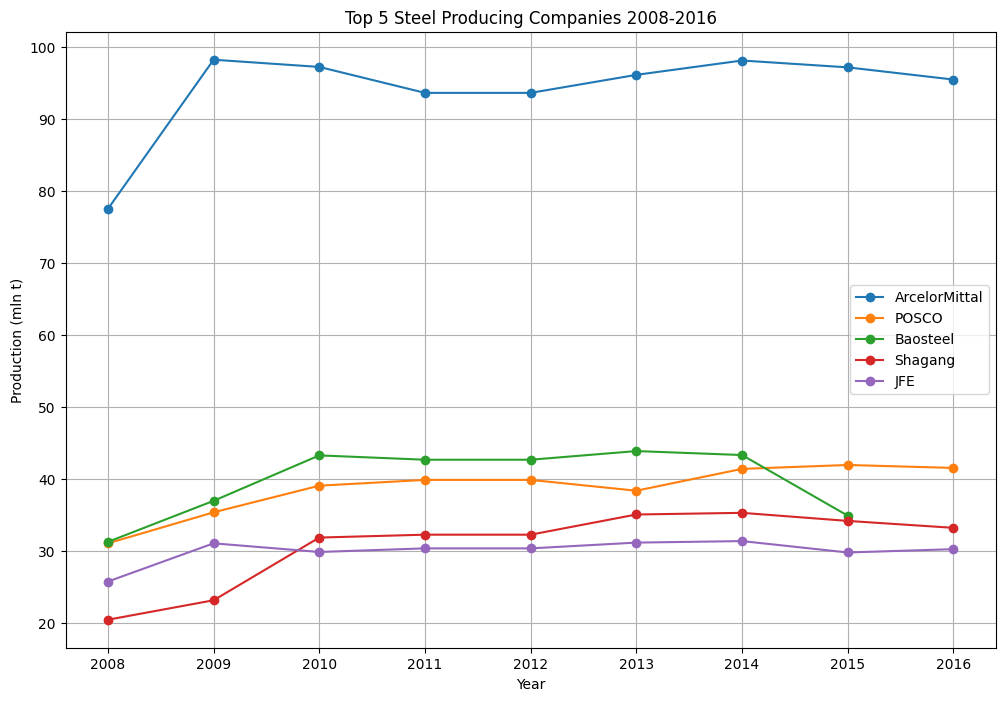

In [13]:

# Sum the total production for each company
total_production_comp = Steel_Prod_Comp.groupby('Company')['Production mln t'].sum()


# Select the top 5 companies based on total production
top5_companies = total_production_comp.nlargest(5).index

# Filter the DataFrame to include only the top 5 companies
top5_data_companies = Steel_Prod_Comp[Steel_Prod_Comp['Company'].isin(top5_companies)]

# Plotting
plt.figure(figsize=(12, 8))
for company in top5_companies:
    company_data = top5_data_companies[top5_data_companies['Company'] == company].sort_values('Year')
    plt.plot(company_data['Year'], company_data['Production mln t'], marker='o', label=company)


plt.xlabel('Year')
plt.ylabel('Production (mln t)')
plt.title('Top 5 Steel Producing Companies 2008-2016')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
Countries_top_and_other = []

for country in Steel_Prod_Country['Country']:
    if country == 'China' or country =='Japan' or country == 'USA' or country =='India' or country =='Russia':
        country = country
        result = Countries_top_and_other.append(country)
    else:
        country = 'Other'
        result = Countries_top_and_other.append(country)

Countries_top_and_other = pd.Series(Countries_top_and_other)
Countries_top_and_other.name = 'Region'
top_vs_other = pd.concat([Steel_Prod_Country, Countries_top_and_other], axis = 1)
top_vs_other

,Country,Production mln t,Year,Region
0,Argentina,5.5,2008,Other
1,Argentina,4.0,2009,Other
2,Argentina,5.1,2010,Other
3,Argentina,5.6,2011,Other
4,Argentina,5.0,2012,Other
...,...,...,...,...
433,Vietnam,4.9,2012,Other
434,Vietnam,5.5,2013,Other
435,Vietnam,5.7,2014,Other
436,Vietnam,5.6,2015,Other


Text(0.5, 1.0, 'Steel production by country 2008-2016')

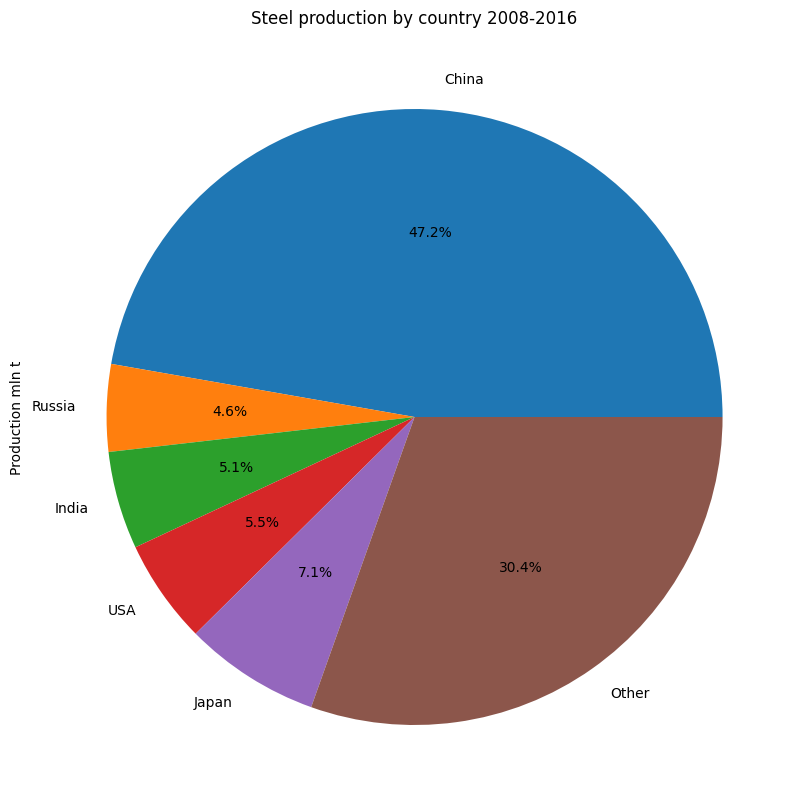

In [33]:
order=['China', 'Russia', 'India', 'USA', 'Japan', 'Other']
global_prod = top_vs_other.drop(['Country', 'Year'], axis=1)
global_prod.sort_values('Production mln t', inplace=True)
global_prod = global_prod.groupby('Region')['Production mln t'].sum()
plot = global_prod.reindex(order).plot.pie(y='Production mln t',autopct='%.1f%%', figsize=(10, 10))

plt.title('Steel production by country 2008-2016')

Text(0.5, 1.0, 'Steel production by country 2008-2016')

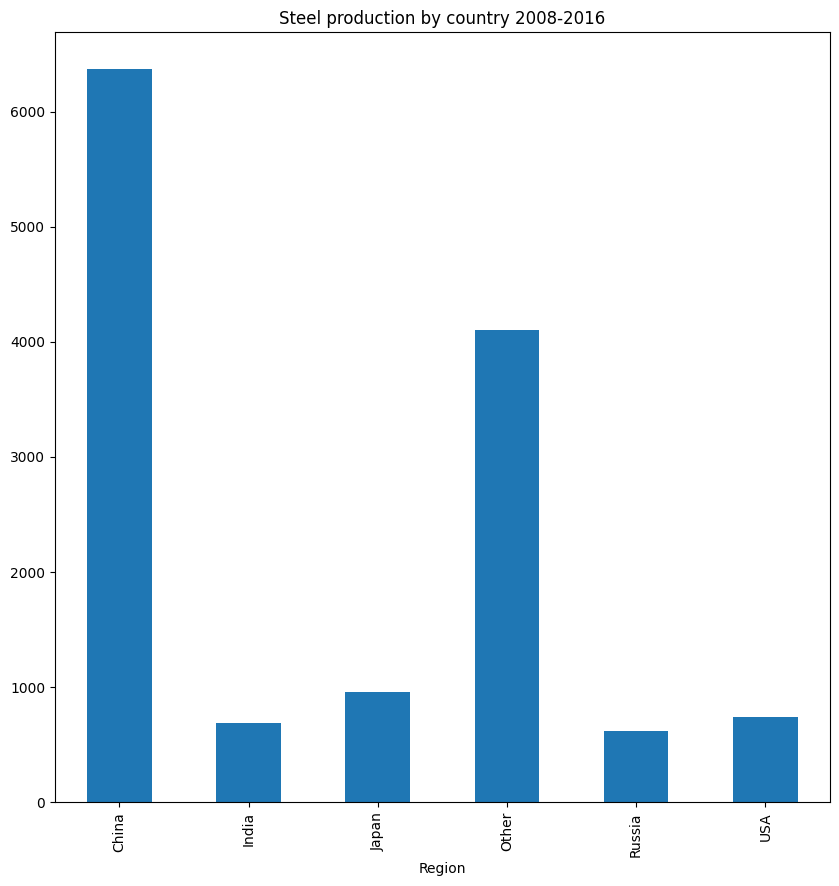

In [48]:
global_prod_bar = top_vs_other.drop('Year', axis=1)
global_prod_bar= global_prod_bar.groupby('Region')['Production mln t'].sum()
plot = global_prod_bar.plot.bar(x='Production mln t', y='Year', figsize=(10, 10))

plt.title('Steel production by country 2008-2016')